# Modeling and Simulation
## Lab 3: Machine Learning
## _Your name here klhe0017_
## _Submission 1_

> Machine learning is the study of computer algorithms
<br> that improve automatically through experience. [[1]](https://en.wikipedia.org/wiki/Machine_learning)

Implementing special-purpose, use-once-and-then-throw-away solutions<br>
for every new prediction task is time-consuming and inefficient.<br>
Instead, we use reusable general-purpose machine-learning models.

In recent years, the set of easily available machine learning models<br>
has steadily increased, and Python has emerged as a go-to.

With its standardized interfaces, scikit-learn [[2]](https://scikit-learn.org/stable/) has one of the most popular<br>
and easy-to-use machine learning libraries 
with a rich set of tutorials [[3]](https://scikit-learn.org/stable/tutorial/index.html).

Other popular libraries are TensorFlow [[4]](https://www.tensorflow.org) and Keras [[5]](https://keras.io).

# Examination

Write your report in this Jupyter notebook [[6]](https://jupyter.org) and hand it in.

You can collect up to 4 points.
- 1 point for completing the task 1-5 listed in the notebook<br>
  (this is the minimum to pass the lab).
- 1 point for demonstrating conceptual understanding<br>
  by documenting, interpreting, and explaining what you<br>
  are doing to solve tasks 1-5.
- 1 point for implementing logistic regression with gradient descent<br>
  and deriving the gradient
  (at the end of the notebook).
- 1 point for implementing, explaining, and comparing<br>
  cross validation and bootstrapping<br>
  (at the end of the notebook).

Do not forget to enter your name and submission number at the top!

# Assignment

In this lab, you are going to use the Titanic data set, explore it, and evaluate<br>
the performance of different machine learning models for a supervised classification<br> task. Along the way, you are going to review the root of basic challenges in<br>
machine learning and address them when fitting your models.

Based on some input data, computer algorithms derive the best parameters<br>
for a given machine learning model. However, your model can only be as good<br>
as your data is. We have to expect that data from real-world measurements<br>
are noisy.

### Why is this a problem?

In general, we don't know where the noise comes from, or in other words,<br>
how it is distributed, and, therefore, we cannot remove it. When we train<br>
a machine learning model on noisy data, the model picks up the noise and<br>
reflects it in its parameters.

In extreme cases, with strong noise, or when the chosen model is very flexible,<br>
we may end up with a useless classifier that picks up too much of the noise.

## Task 1
Explain the bias-variance trade-off with your own words, using an example. <br>
Describe ways to avoid underfitting and overfitting.

Answer for task 1 goes here... (double click to edit)

# Familiarising yourself with the data

The first step in solving a learning challenge is to understand your data.<br>
We will use the Titanic data set. It is a good starting point if you're new<br>
to machine learning.

## Task 2

1. Describe the data set.
2. What is the task (that is, what is it that you should predict)?
3. What features are there?
4. What preprocessing do you expect you have to do?


Answer for task 2 goes here...

### Load your data below

In [1]:
# Pandas lets us create "data frames" that works well with sklearn
# Documentation: https://pandas.pydata.org/docs/
import pandas as pd
import numpy as np

# If you run on colab, the sklearn version is older than what you get with anaconda
#import sklearn
#print("sklearn version:", sklearn.__version__) # sklearn version: 0.22.2.post1

# Load your data set
data = pd.read_csv("titanic3.csv") 

data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


## Task 3
Sometimes, simple descriptive statistics can reveal a lot<br>
about a data set. For example, you could find highly<br>
informative or un-informative features using some plots.

1. Explore your data by using some basic<br>statistical analysis and plotting.
2. Describe and interpret what you find.

Answer for task 3 goes here...

In [2]:
# Import plotting libraries
import matplotlib.pyplot as plt
import warnings; warnings.simplefilter(action='ignore', category=FutureWarning)
# Seaborn documentation: https://seaborn.pydata.org
import seaborn as sns
sns.set()

# Here are some examples, but you probably need to create other plots...

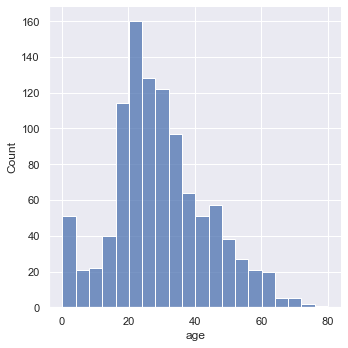

In [4]:
# Plot the age distribution
sns.displot(data, x="age", bins=20)

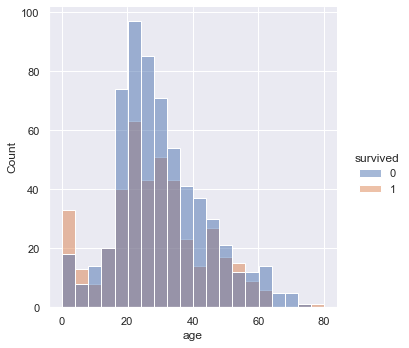

In [5]:
# Maybe better to plot per class?
sns.displot(data, x='age', hue="survived", bins=20)

TypeError: The x variable is categorical, but one of ['numeric', 'datetime'] is required

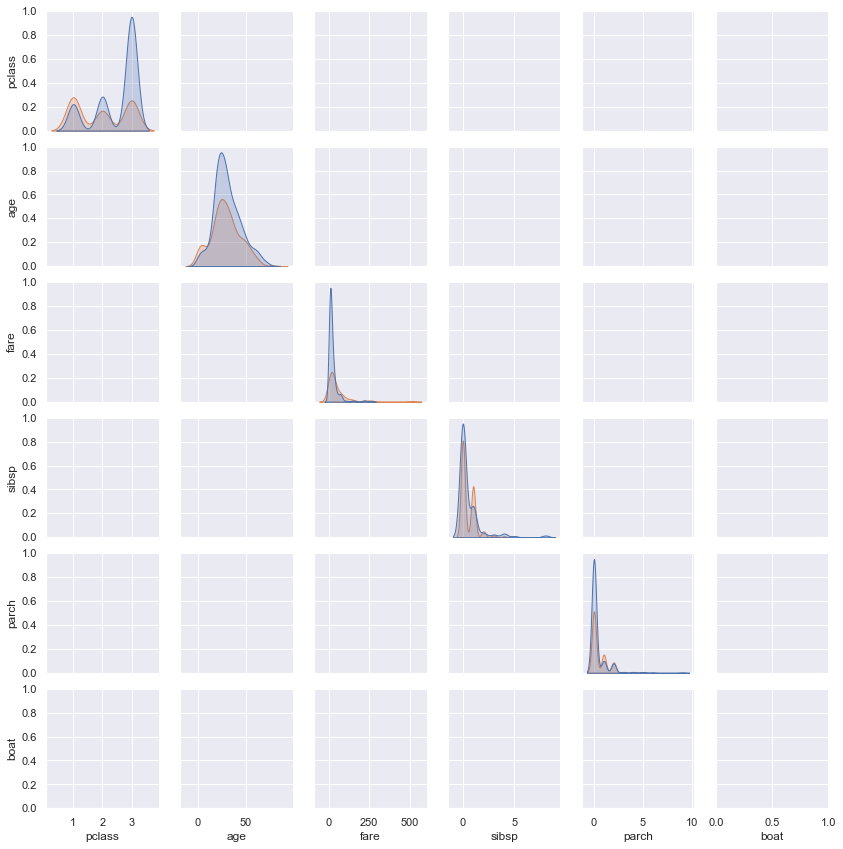

In [35]:
# Pair plots can help you get an intuition for
# how the data is distributed.
# (You need to preprocess categorical features to include them in the pairplot.)
sns.pairplot(data, vars=["pclass", "age", "fare", "sibsp", "parch"], hue='survived', height=2);

# Prepare the data

In [74]:
# You will probably need to scale the data or deal with missing values
# Imputation is when you replace missing values by the mean or median,
# but what about a categorical value, such as gender?
# When should you use the mean vs the median?

from sklearn.preprocessing import \
    MaxAbsScaler, StandardScaler, LabelBinarizer, LabelEncoder
from sklearn.impute import SimpleImputer

# train_test_split can help you create training and test sets from your data.
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
from sklearn.model_selection import train_test_split

# 1. Imputation
# 2. Preprocessing
# 3. Split into train and test sets

# Convert data into numeric representation
numeric_data = data


gender_col = data['sex'].replace(to_replace = ('female', 'male'), value=(0, 1))
numeric_data['sex'] = gender_col

numeric_data = numeric_data.drop('home.dest', axis=1)
numeric_data = numeric_data.drop('name', axis=1)
numeric_data = numeric_data.drop('ticket', axis=1)
numeric_data = numeric_data.drop('body', axis=1)
numeric_data = numeric_data.drop('cabin', axis=1)
numeric_data = numeric_data.drop('boat', axis=1)

numeric_data['embarked'] = data['embarked'].replace(to_replace=('C', 'Q', 'S'), value=(0,1,2))

numeric_data.head()

# Imputate NaNs

# for now, drop em!
numeric_data = numeric_data.dropna()

train_data_fraction = 0.8
train_data_count = int(np.ceil(train_data_fraction*numeric_data.shape[0]))

X = numeric_data.drop(['survived'], axis=1).values
y = numeric_data['survived'].values

X_train = X[0:train_data_count]
y_train = y[0:train_data_count]

X_test = X[train_data_count:]
y_test = y[train_data_count:]

print(X_train.shape)
print(X_test.shape)

scaler = StandardScaler()
X = scaler.fit_transform(X)

(835, 7)
(208, 7)


# Plot of the processed data

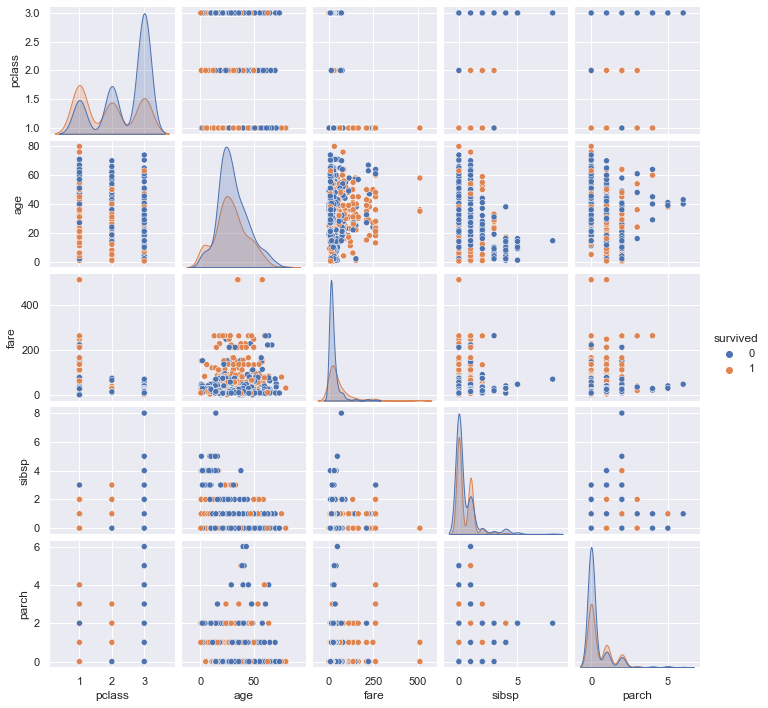

In [71]:
sns.pairplot(numeric_data, vars=["pclass", "age", "fare", "sibsp", "parch"], hue='survived', height=2);

# Training machine learning models and tuning parameters

Now that you have familiarized yourself with your data set<br>
and you know what the classification task is about, it's time<br>
to select machine learning models.

## Task 4

### a) Fit the models
- Pick at least 2 machine learning models and fit them to your<br>
training data using cross-validation to tune the model parameters.<br>
In the documentation for each model, you can find different _hyperparameters_<br>
to test using `GridSearchCV`.

- Explain with your own words how the 2 models make predictions.


Answer for task 4 goes here...

# DecisionTree train

In [69]:
# Import the decision tree classifier
from sklearn.tree import DecisionTreeClassifier

# There are many other models to choose from...
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.svm import SVC

# Import GridSearchCV to optimise hyperparameters
from sklearn.model_selection import GridSearchCV

tree = DecisionTreeClassifier()

# By default, GridSearchCV can create huge trees, so we put a max limit.
param_grid = {
    "max_depth": [2, 4, 8, 16, None],
    "min_samples_split" : [2, 3, 4, 5]
}

# Create a GridSearchCV with the decision tree as the estimator
# and use 10-fold cross-validation
# User guide: https://scikit-learn.org/stable/modules/grid_search.html#grid-search
grid_search = GridSearchCV(estimator=tree,
                           param_grid=param_grid,
                           cv=10,
                           return_train_score=True,
                           verbose=1)

grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)

# GridSearchCV uses accuracy as score by default for classification tasks.
print("Best accuracy:", grid_search.best_score_)


Fitting 10 folds for each of 20 candidates, totalling 200 fits
Best parameters: {'max_depth': 2, 'min_samples_split': 2}
Best accuracy: 0.7513919413919414


# MLP Train

In [76]:
from sklearn.neural_network import MLPClassifier

# Import GridSearchCV to optimise hyperparameters
from sklearn.model_selection import GridSearchCV

mlp = MLPClassifier()

# By default, GridSearchCV can create huge trees, so we put a max limit.
param_grid = {
    "hidden_layer_sizes": [(400, 200, 150), (400, 200), (200, 150), (450, 170)]
}

# Create a GridSearchCV with the decision tree as the estimator
# and use 10-fold cross-validation
# User guide: https://scikit-learn.org/stable/modules/grid_search.html#grid-search
grid_search = GridSearchCV(estimator=mlp,
                           param_grid=param_grid,
                           cv=10,
                           return_train_score=True,
                           verbose=1)

grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)

# GridSearchCV uses accuracy as score by default for classification tasks.
print("Best accuracy:", grid_search.best_score_)

Fitting 10 folds for each of 4 candidates, totalling 40 fits
Best parameters: {'hidden_layer_sizes': (400, 200)}
Best accuracy: 0.798766494549627


# Model evaluations

With the model parameters, you can move on and estimate<br>
the performance of your models.

## Task 5
- Use confusion tables to show the models' performance.

- Calculate performance measures, such as accuracy,<br>
precision, and recall.

- Discuss your findings.
    - Compare the models' performance.
    - Describe how do they differ.
    - Which one did best? Can you explain why?

Answer to task 5 goes here...



In [ ]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, \
    accuracy_score, precision_score, recall_score

# Example: one way to present results
# There's also metrics.classification_report
y_predict = grid_search.predict(X_test)

plot_confusion_matrix(grid_search, X_test, y_test, display_labels=["deceased", "survived"])
plt.grid(False)

print("Accuracy:", accuracy_score(y_test, y_predict))

# Bonus 1 (1 point)
In logistic regression, the likelihood function is given by the sigmoid
$$ \sigma(z) = \frac{1}{1 + e^{-z}} $$

## Tasks
- Derive the gradient of the cross entropy used in logistic regression.
  
  To simplify the calculations, define
  $$ \mathbf{\hat{x}}_i = [\mathbf{x}_i, 1] $$
  $$ \mathbf{\hat{w}} = [\mathbf{w}, b] $$
  to account for the bias in the dot product
  $\mathbf{\hat{w}} \cdot \mathbf{\hat{x}}_i$.

  The cross entropy is
  $$ E(\mathbf{\hat{w}}) = -\sum_i y_i \log f_i + (1 - y_i) \log (1 - f_i) $$
  where $f_i = \sigma(\mathbf{\hat{w}} \cdot \mathbf{\hat{x}}_i)$
  The gradient of the cross entropy is
  $$ \nabla E(\mathbf{\hat{w}}) = \sum_i \mathbf{\hat{x}}_i (f_i - y_i). $$
  You can use the fact that
  $$ \frac{d\sigma}{dz} = \sigma(z) \left( 1-\sigma(z) \right). $$

- Implement logistic regression and gradient descent and fit your model<br>
  to the training set.

- Compare the performance to the best model you found before<br>
  (using the test set).
- Comment on the results.

(Answer goes here...)

In [ ]:
def sigmoid(x):
    """
    The likelihood function
    """
    return 1 / (1 + np.exp(-x))

In [ ]:
def log(p):
    """
    Auxillary function to avoid multiplying with -Inf

    When
        y = f = 0
    the expression
        y * np.log(f) = 0 * -Inf = NaN

    Returns
    -------
    the log of p when p is positive, else 0
    """
    return np.log(p) if p > 0 else 0

In [ ]:
def update(X, y, w, b, alpha):
    """
    Perform one step of gradient descent

    Parameters
    ----------
    X
        list of features (n_samples, n_features)
    y
        list of targets (n_samples, 1)
    w
        weights (n_features)
    b
        bias
    alpha
        the learning rate

    Returns
    -------
    w
        the updated weights 
    b
        the updated bias
    """
    ...

    return w, b

In [ ]:
def error(X, y, w, b):
    """
    Calculate the loss function in logistic regression
    using the cross entropy

    Parameters
    ----------
    X
        list of features (n_samples, n_features)
    y
        list of targets (n_samples, 1)
    w
        weights (n_features)
    b
        bias

    Returns
    -------
    err
        the cross entropy    
    """
    err = 0.0

    ...

    return err

In [ ]:
def train(X, y, w, b, alpha=0.001, epochs=10000):
    """
    Optimize the model parameters w and b using gradient descent

    Parameters
    ----------
    X
        list of features (n_samples, n_features)
    y
        list of targets (n_samples, 1)
    w
        weights (n_features)
    b
        bias
    alpha
        the learning rate
    epochs
        the number of gradient descents epochs
    
    Returns
    -------
    w
        the optimized weights
    b
        the optimized bias
    """

    ...

    return w, b

In [ ]:
# Initial weights and bias
w0 = np.zeros_like(X_train.loc[0])
b0 = 0

# Train the model
w, b = train(X_train.to_numpy(), y_train.to_numpy(), w0, b0)

In [ ]:
# Test the optimized model parameters on the test set.
# You also need to computer other metrics to compare to the best model from before.
y_pred = []

for x in X_test.values:
    f = sigmoid(np.dot(w, x) + b) > 0.5
    y_pred.append(f)

# Display a basic confusion matrix
confusion_matrix(y_test, y_pred)

# Bonus 2 (1 point)

## Tasks
Implement the resampling techniques cross validation and bootstrapping.

Fill in the missing code in the code blocks below and document your code with comments.

Also, describe with your own words how cross validation and bootstrapping work and why these techniques are used.

In [ ]:
def my_cross_validation(samples, k = 2):
  """
  Our own, basic implementation of cross validation.

  Parameters
  ----------
  samples
    A list of samples.
  
  k
    The number of folds we would like to use. Default: 2.

  Returns
  -------
  A list with k elements where each element contains one 
  training and one validation set.

  Example
  -------
  samples = [x1, x2, x3, x4, x5, x6]
  k       = 3

  Then, when we run 
  >>> folds = my_cross_valudation(sample, k)
  we expect that folds holds the following list (or similar, depending
  on the details of your implementation)
  [([x3,x4,x5,x6],[x1,x2]), ([x1,x2,x4,x5],[x3,x4]), ([x1,x2,x3,x4],[x5,x6])]

  """
  # your solutions goes here
  folds = ...

  return folds

In [ ]:
def my_bootstrap(samples):
  """
  Our own implementation of bootstrapping.

  Parameters
  ----------
  samples
    A list of samples.
  
  Returns
  -------
  A list of samples, drawn with replacement from the input list of samples.
  The resulting list should have the same length as the input.

  Example
  -------
  samples = [x1,x2,x3,x4,x5,x6]

  Then, when we run
  >>> bootstrapped = my_bootstrap(samples)
  we expect that bootstrapped holds a value similar to the following
  [x2,x5,x3,x1,x2,x4]
  """
  # your solution goes here
  resample = ...

  return resample